# Odpowiedzi na pytania z Przypomnienie.ipynb

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

## Pominięcie funkcji min

In [2]:
c = pd.read_html('http://www.worldometers.info/geography/alphabetical-list-of-countries/')
panstwa = c[0]
ile_panstw = panstwa.count(0)
ile_atrybutow = panstwa.count(1)
print("panstw:\n", ile_panstw, ",\n\natrybutów:\n", ile_atrybutow)

panstw:
 #                   195
Country             195
Population(2019)    195
Land Area (Km²)     195
Density(P/Km²)      195
dtype: int64 ,

atrybutów:
 0      5
1      5
2      5
3      5
4      5
      ..
190    5
191    5
192    5
193    5
194    5
Length: 195, dtype: int64


> Funkcja count zwraca nam Series, który zawiera wszystkie informację które udało się zebrać. Należy wziąć minimalną wartość od tego Series, aby uzyskać prawdziwą jednoznaczną liczbę objektów, o których mamy pełny zestaw informacji.

In [3]:
print(type(ile_panstw), type(ile_atrybutow))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [4]:
print("panstw:\n", min(ile_panstw), "\n\natrybutów:\n", min(ile_atrybutow))

panstw:
 195 

atrybutów:
 5


# Państwa zbliżone do Polski ze względu na populację

> Najbardziej zbliżone do Polski państwa ze względu na populację to Afganistan i Kanada; ze względu na populację i powierzchność - Afganistan

In [5]:
delta_pop = 1000000
pop_pl = panstwa[panstwa['Country']=='Poland'].iloc[0,2]
panstwa[ (panstwa.iloc[:,2] > (pop_pl - delta_pop)) & (panstwa.iloc[:,2] < (pop_pl + delta_pop)) ]

,#,Country,Population(2019),Land Area (Km²),Density(P/Km²)
0,1,Afghanistan,38041754,652860,58
32,33,Canada,37411047,9093510,4
139,140,Poland,37887768,306230,124


In [6]:
delta_area = 1000000
area_pl = panstwa[panstwa['Country']=='Poland'].iloc[0,3]
panstwa[
    (panstwa.iloc[:,3] > (area_pl - delta_area)) & (panstwa.iloc[:,3] < (area_pl + delta_area)) 
    & (panstwa.iloc[:,2] > (pop_pl - delta_pop)) & (panstwa.iloc[:,2] < (pop_pl + delta_pop)) 
]

,#,Country,Population(2019),Land Area (Km²),Density(P/Km²)
0,1,Afghanistan,38041754,652860,58
139,140,Poland,37887768,306230,124


# Miary danych i wykresy dla dane1 oraz iris

> **Zadanie** Skonfrontuj, dla obu powyższych zbiorów, podstawowe miary danych z wykresami: histogramem, wykresem pudełkowym i punktowym (macierzy wykresów punktowych), dla kompletnych zbiorów i dla poszczególnych klas w tych zbiorach. Zlokalizuj poszczególne miary na wykresach. Oceń łatwość lokalizacji poszczególnych miar na każdym rodzaju wykresu. Jakie wnioski dotyczące każdego ze zbiorów danych mógłbyś wyciągnąć z powyższych obserwacji ?

> **Zadanie** Oceń na podstawie miar oraz wykresów, jakie cechy przypadku zbiorów `d` oraz `iris` decydują o przynależności obiektów do poszczególnych klas.

> **Zadanie** Skonfrontuj macierz korelacji z wykresami punktowymi zbiorów `d` oraz `iris`. Jaka jest zależność między konfiguracją punktów na wykresie punktowym a wartością miary korealcji ? Jakie wnioski odnoszące się do poszczególnych atrybutów można wyciągnąć na podstawie analizy macierzy korelacji ?  

## Zbiór danych: dane1.csv

In [7]:
d = pd.read_csv('dane1.csv')
print(d.describe())
d.head()

        atrybut1   atrybut2
count  80.000000  80.000000
mean   49.012500  41.275000
std    26.009976  23.377461
min     4.000000   7.000000
25%    29.750000  22.000000
50%    47.500000  34.500000
75%    73.000000  64.250000
max    87.000000  86.000000


,atrybut1,atrybut2,klasa
0,86,43,klasa 3
1,79,50,klasa 3
2,73,49,klasa 3
3,69,49,klasa 3
4,74,43,klasa 3


> Odrazu widać, że mediana jest mniejsza od średniej, oznacza to że większość objektów ma wartości mniejsze od średniej.

In [8]:
d[d['atrybut2'] <= d['atrybut2'].mean()].count()

atrybut1    47
atrybut2    47
klasa       47
dtype: int64

## Histogramy

### Histogram dla całego zbioru, nie uwzględniając klas.

[Text(0.5, 0, 'histogram atrybutów dla dane1.csv')]

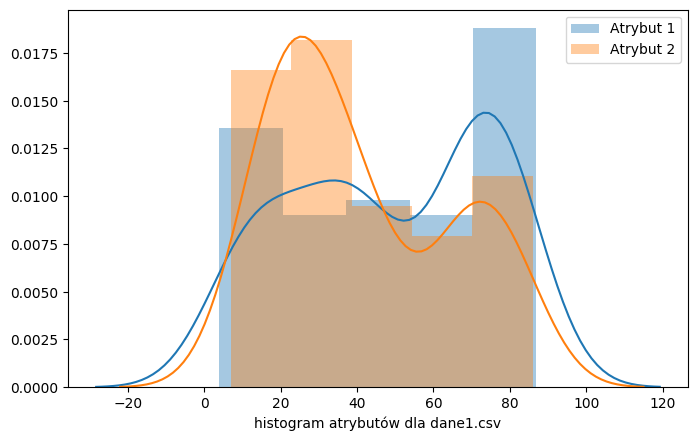

In [9]:
plt.figure(figsize=(8,5), dpi=100)
sns.distplot(d.iloc[:,0], label='Atrybut 1')
ax = sns.distplot(d.iloc[:,1], label='Atrybut 2')
plt.legend()
ax.set(xlabel='histogram atrybutów dla dane1.csv')

### Histogram uwzględniając klasy

> Widać, że poszczególne histogramy dążą do rozkładu normalnego. 

> Również widać że atrybut 2 mniej przydałby się do klasyfikacji, skoro istnieje duża strefa wzajemnego nachodzenia się klas 2 i 3.

> Patrząc na histogramy też możemy powiedzieć coś o miarach, np. możemy oczekiwać, że średnia wartość atrybutu 1 dla klasy 1 będzie bliska 40 (sprawdzenie niżej). Chociaż histogram nie służy głównie do pokazania takich miar.

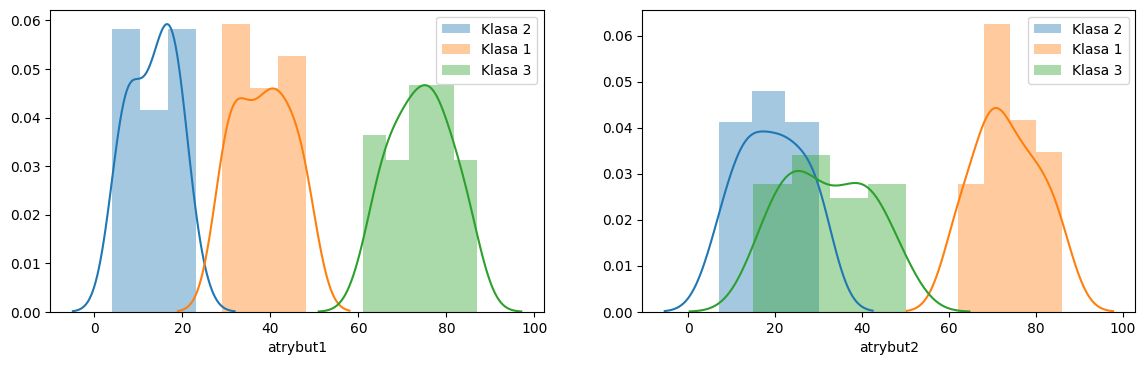

In [10]:
plt.figure(figsize=(14,4), dpi=100)

plt.subplot(1, 2, 1)
sns.distplot(d.loc[d.klasa == 'klasa 2','atrybut1'], label="Klasa 2")
sns.distplot(d.loc[d.klasa == 'klasa 1','atrybut1'], label="Klasa 1")
sns.distplot(d.loc[d.klasa == 'klasa 3','atrybut1'], label="Klasa 3")
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(d.loc[d.klasa == 'klasa 2','atrybut2'], label="Klasa 2")
sns.distplot(d.loc[d.klasa == 'klasa 1','atrybut2'], label="Klasa 1")
sns.distplot(d.loc[d.klasa == 'klasa 3','atrybut2'], label="Klasa 3")
plt.legend()

In [11]:
d[d['klasa']=='klasa 1']['atrybut1'].mean()

38.458333333333336

## Wykresy pudełkowe

> Używając boxplotu łatwo jest określić podstawowe miary, np. środkowe linie wskazują, iż mediany wynoszą ~45 oraz ~35 dla atrybutów 1 i 2, co zgadza się z wynikiem funkcji d.describe() wyżej.

> Obserwując maksymalną i minimalną wartości atrybutów możemy też wnioskować o zawarciu w zbiorze danych anomalnie dużych albo anomalnie małych wartości.

> Podobnie jak z histogramem, wykresy pudełkowe z podziałem na klasy pokazują, że atrybut 2 mniej nadaje się w sprawach np. klasyfikacji, chociaż histogramy pokazują to lepiej (pokazują wspólny obszar).

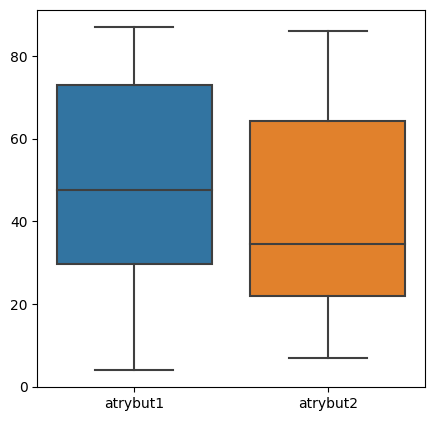

In [12]:
plt.figure(figsize=(5,5), dpi=100)
sns.boxplot(data=d)

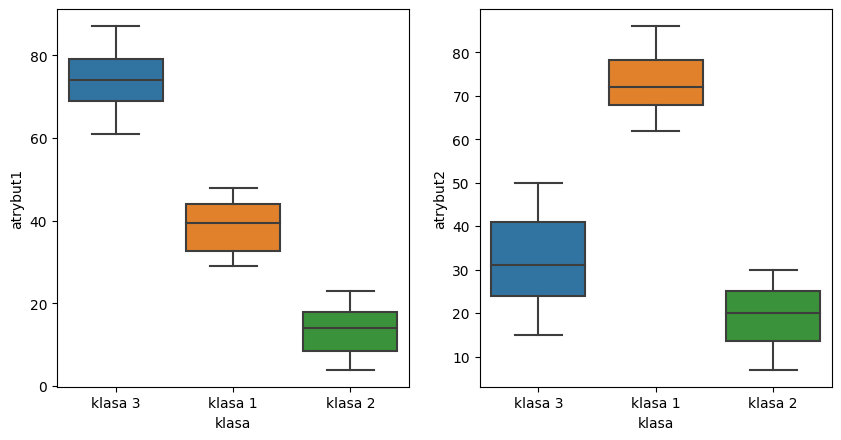

In [13]:
plt.figure(figsize=(10,5), dpi=100)

plt.subplot(1, 2, 1)
sns.boxplot(x='klasa', y='atrybut1', data=d)

plt.subplot(1, 2, 2)
sns.boxplot(x='klasa', y='atrybut2', data=d)

## Macierz wykresów punktowych

> Patrząc na wykresy punktowe dość trudno powiedzieć o miarach danych (np. określić średnią dla poszczególnych klas nie da się czystym okiem).

> Natomiast zaletą jest to że możemy zaobserwować przynależność danych do klas (lepiej widać z kolorami, ale bez kolorów można czasem zrobić wnosek patrząc na położenie); korelację pomiędzy atrybutami (w tym przypadku jej nie ma); ogólnie wnioskować o tym jak liczny jest naż zbiór.

> Skoro wykres pairplot zawiera histogramy, też to przydaje się do wnioskowanie o stopniu przydajności wykresu w sprawach klasyfikacji.

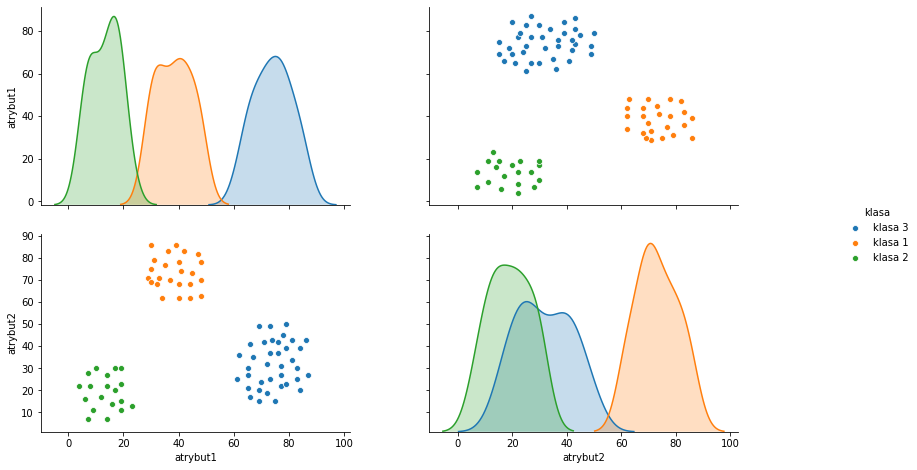

In [14]:
g = sns.pairplot(d, kind='scatter', hue='klasa')
g.fig.set_figwidth(14)
g.fig.set_figheight(7)

## Macierz korelacji

> Macierz korelacji pokazuję związek atrybutów i stopień ich zależności. W tym przypadku istnieje słaba korelacja niegatywna, ale jest tak bliska zeru, że możemy zadeklarować, iż atrybuty są od siebie niezależne. Też możemy to zaobserwować na wykresach punktowych, skoro dystrybucja punktów nie tworzy wykres równania liniowego.

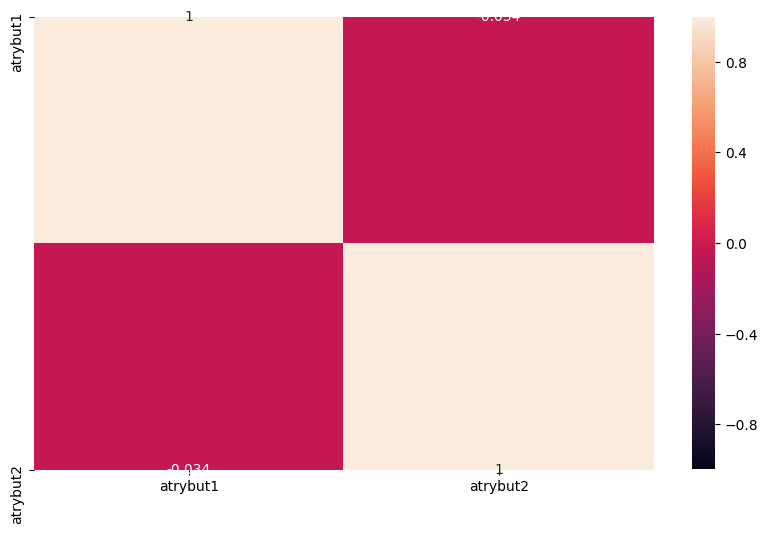

In [15]:
plt.figure(figsize=(10, 6), dpi=100)
sns.heatmap(d.corr(), vmin=-1, annot=d.corr())

## Zbiór danych: Iris

> Dobry przypadek zbilansowanego datasetu, gdy prawie dla wszystkich atrybutów średnia jest bliska medianie.

In [16]:
from seaborn import load_dataset
iris = load_dataset("iris")
print(iris.describe())
iris.head()

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Histogramy

[Text(0.5, 0, 'Petal')]

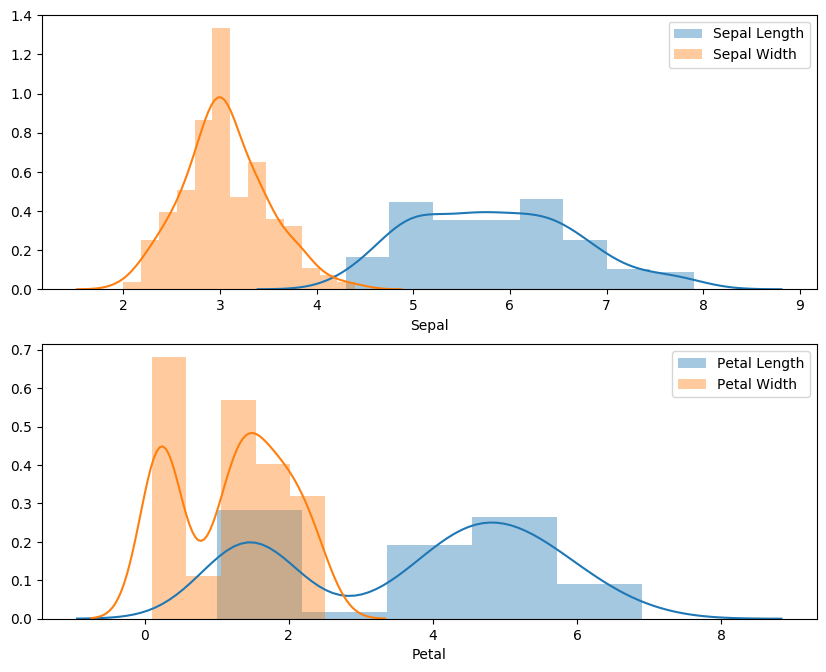

In [17]:
plt.figure(figsize=(10,8), dpi=100)

plt.subplot(2, 1, 1)
sns.distplot(iris.iloc[:,0], label='Sepal Length')
ax = sns.distplot(iris.iloc[:,1], label='Sepal Width')
plt.legend()
ax.set(xlabel='Sepal')

plt.subplot(2, 1, 2)
sns.distplot(iris.iloc[:,2], label='Petal Length')
ax = sns.distplot(iris.iloc[:,3], label='Petal Width')
plt.legend()
ax.set(xlabel='Petal')

## Histogramy z podziałem na klasy

> Dobrze widać, że gatunek Setosa ma znacznie wyróżnione parametry związane z Petal, więc na podstawie petal_width i petal_height można wyróżnić tę klasę. 

> Rozróżnienie Versicolor i Virginica nie jest tak proste, chociaż wydaje się, że petal_width i petal_height tu też przydają się więcej.

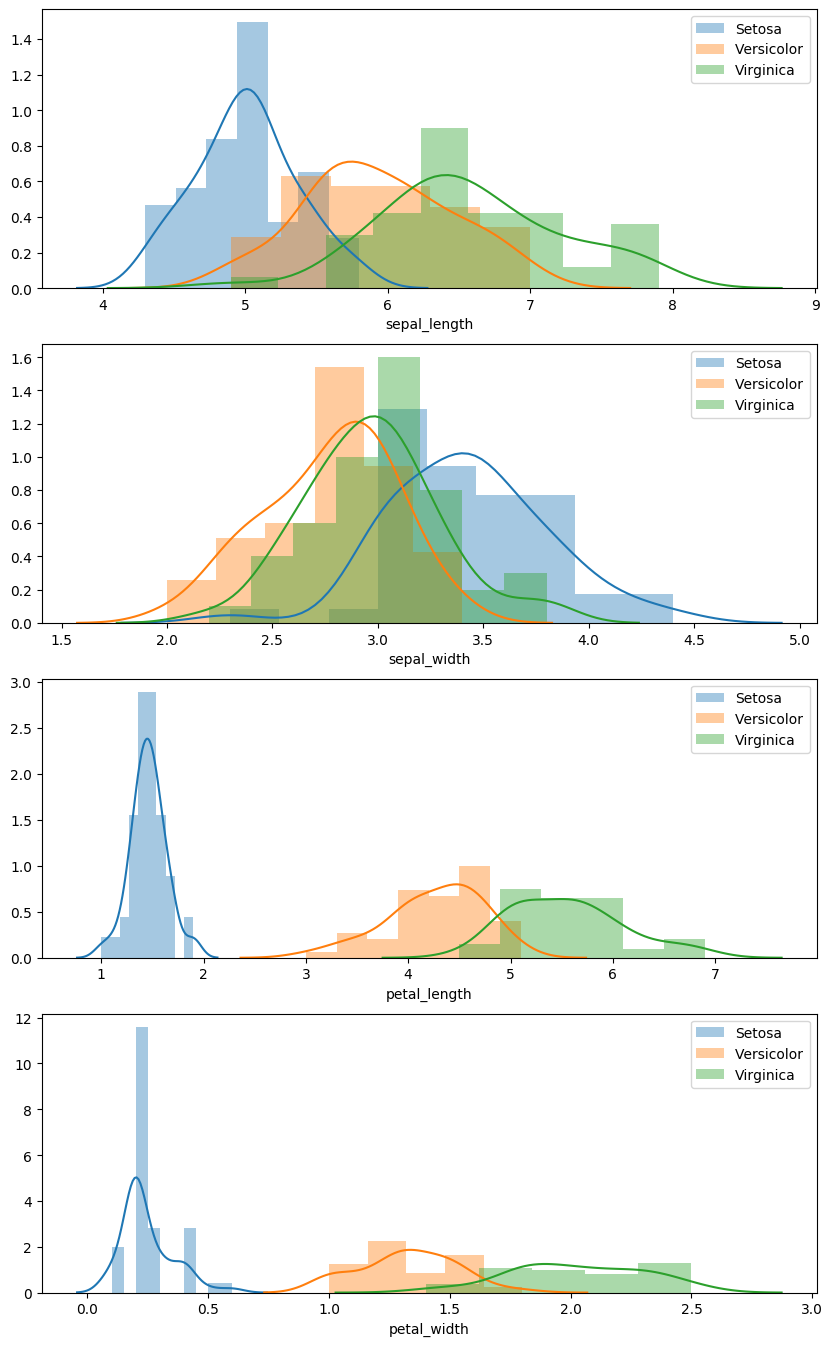

In [18]:
plt.figure(figsize=(10,17), dpi=100)

list_iris = list(enumerate(iris.columns))[:-1]

for i, atr in list_iris:
    plt.subplot(4, 1, i+1)
    sns.distplot(iris.loc[iris['species']=='setosa', atr], label='Setosa')
    sns.distplot(iris.loc[iris['species']=='versicolor', atr], label='Versicolor')
    sns.distplot(iris.loc[iris['species']=='virginica', atr], label='Virginica')
    plt.legend()

# Wykresy pudełkowe

> Obserwujemy, że w przypadku sepal_width powstały tzw. outliers, czyli punkty większe/mniejsze od 1.5 razy trzeci kwartyl. Świadczy to o tym, że w sepal_width mogą być anomalne wartości.

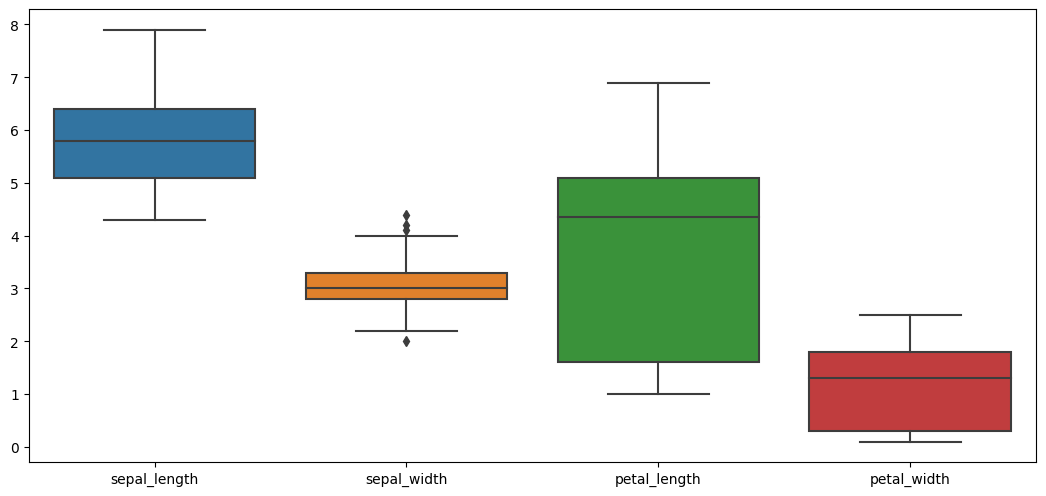

In [19]:
plt.figure(figsize=(13,6), dpi=100)
sns.boxplot(data=iris)

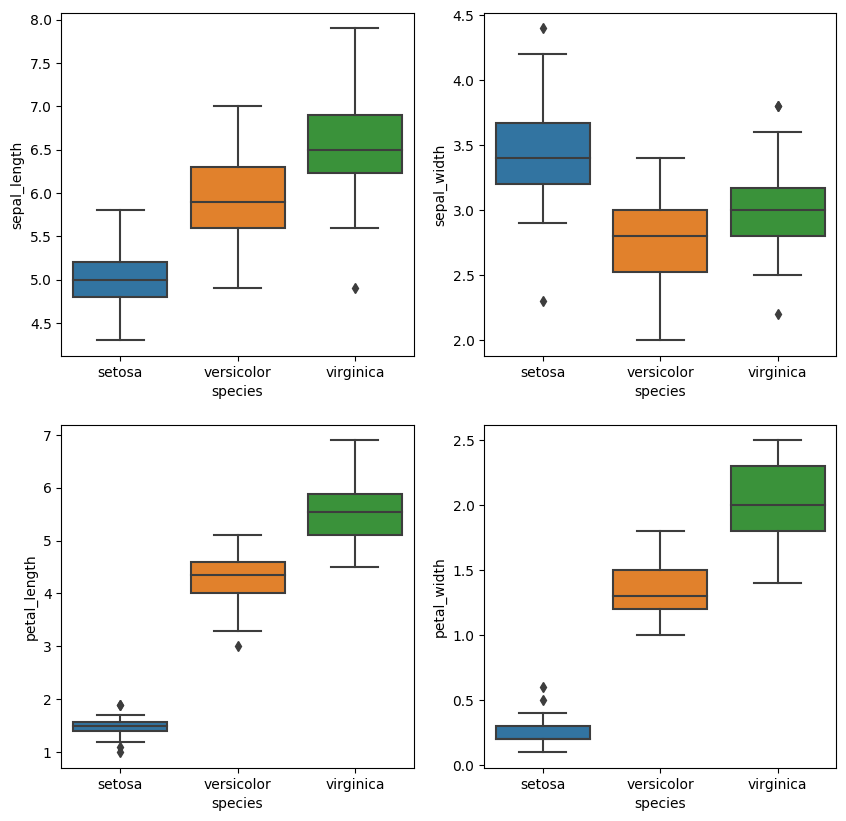

In [20]:
plt.figure(figsize=(10,10), dpi=100)

for i, atr in list_iris:
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=atr, data=iris)

## Macierz wykresów punktowych

> Dzięki wykresom punktowycm jesteśmy w stanie zaobserwować pewną korelację pomiędzy atrybutami. Np. na wykresie (sepal_length, petal_length) dobrze widać liniową zależność (korelację) tych parametrów od siebie dla gatunków Vesticolor i Virginica, oraz brak tej korelacji dla gatunku Setosa.

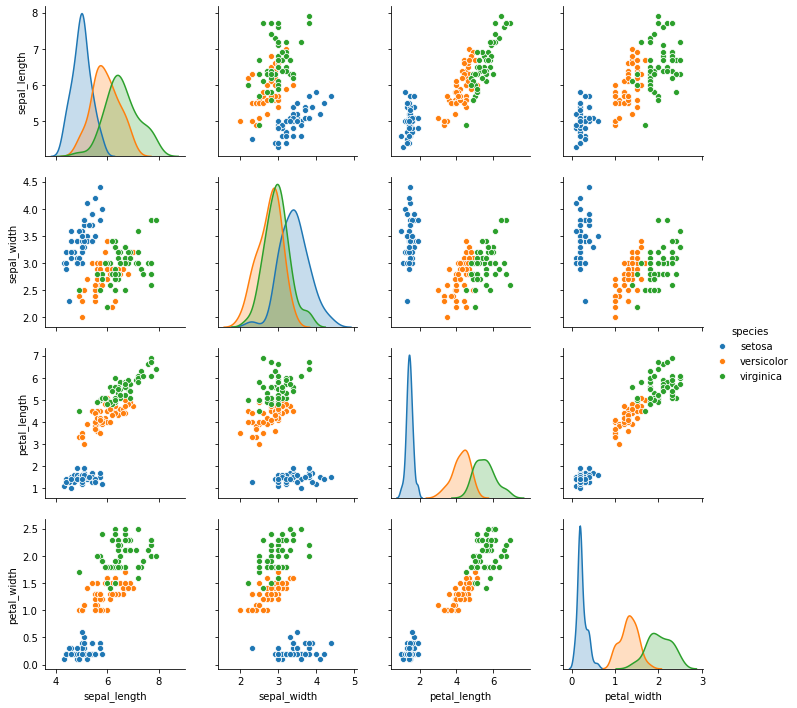

In [21]:
sns.pairplot(iris, kind='scatter', hue='species')

> Jeszcze bardziej przydatnym narzędziem będzie macierz policzonej korelacji. Im liczba jest bliższa zeru, tym mniej atrybuty zależą od siebie. Widać, że świetlejsze komórki mają pozytywną korelację, ciemniejsze - niegatywną.

> Korelację można traktować w tym przypadku jako współczynnik przy x w równianiu liniowym, który nie rośnie powyżej 1. Wykres takiego równania powstaje właśnie z punktów na wykresie punktowym.

> Na podstawie korelacji można później wnioskować o prszyczynowości.

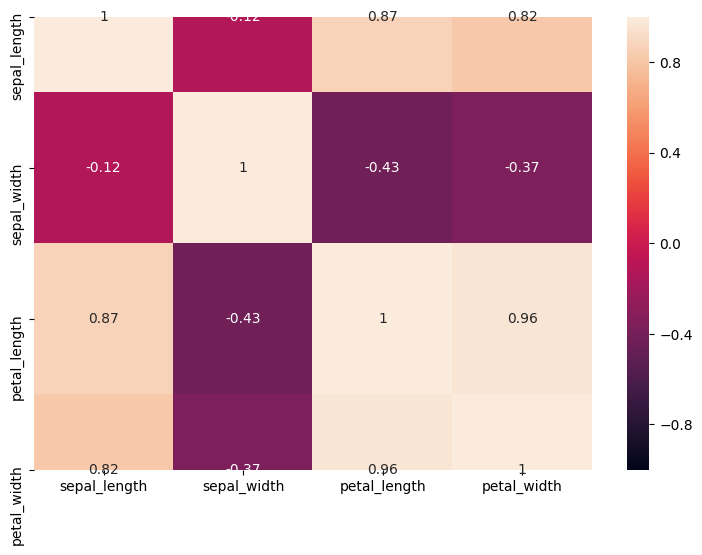

In [22]:
plt.figure(figsize=(9, 6), dpi=100)
sns.heatmap(iris.corr(), vmin=-1, annot=iris.corr())

# Analiza danych domowe.csv

> Zadaniem była analiza podanego zbioru. Użyłem tej samej strategii co powyżej - rysuję wykresy i staram się zdecydować, jakie atrybuty są bardziej przydatne w sprawach np. klasyfikacji nowych danych.

In [23]:
df = pd.read_csv('zestaw 20.csv')
print(df.shape)
print(df.describe())
df.head()

(3462, 8)
                 A            B            C            D            E  \
count  3449.000000  3447.000000  3451.000000  3458.000000  3455.000000   
mean   -163.991156   201.643331  -412.657117   122.965198    35.532750   
std      23.330881    41.425824   186.189493   215.378747    28.577497   
min    -204.206702   130.649214  -883.420091  -518.464225   -18.521361   
25%    -185.290471   165.798908  -548.079473   -27.712725    16.064384   
50%    -156.886844   200.462793  -431.696992   123.522584    29.497625   
75%    -144.675143   237.380112  -285.330530   275.562348    58.837510   
max    -129.597369   275.420032   181.191612   850.217691    95.476945   

                 F            G        klasa  
count  3444.000000  3451.000000  3462.000000  
mean    223.437860  -172.978997     1.999133  
std     177.462744   111.397053     1.414520  
min      -9.130960  -434.537340     0.000000  
25%      58.964778  -254.974048     1.000000  
50%     169.455840  -180.642822     2.000

,A,B,C,D,E,F,G,klasa
0,-146.975621,251.670979,-461.987047,259.662591,33.185947,61.834810,-312.500417,1
1,-144.732736,198.586950,-235.210119,335.347646,34.825321,19.674752,-302.219383,1
2,-185.292042,273.690944,-434.478449,15.161325,-8.539459,382.441326,-141.536112,3
3,-184.648275,199.267258,-667.320928,-98.444469,-1.595692,351.135417,-94.167767,3
4,-184.933441,274.409129,-429.713076,219.474317,-3.226407,339.801021,-76.854744,3


> Na początku zobaczyliśmy, że mamy 5 klas, a również to, że kolumny mają różną ilość wartości - podejrzenie, że zbiór przechowuje wartości NaN. Zliczamy takie wartości:

In [24]:
df.isna().sum()

A        13
B        15
C        11
D         4
E         7
F        18
G        11
klasa     0
dtype: int64

In [25]:
df = df.dropna()
df

,A,B,C,D,E,F,G,klasa
0,-146.975621,251.670979,-461.987047,259.662591,33.185947,61.834810,-312.500417,1
1,-144.732736,198.586950,-235.210119,335.347646,34.825321,19.674752,-302.219383,1
2,-185.292042,273.690944,-434.478449,15.161325,-8.539459,382.441326,-141.536112,3
3,-184.648275,199.267258,-667.320928,-98.444469,-1.595692,351.135417,-94.167767,3
4,-184.933441,274.409129,-429.713076,219.474317,-3.226407,339.801021,-76.854744,3
...,...,...,...,...,...,...,...,...
3457,-136.049423,251.012465,-290.481020,231.178004,68.156027,11.568869,-124.046128,4
3458,-141.623228,212.699509,-439.743869,112.378983,30.645874,28.485942,-334.137649,1
3459,-155.427699,148.317362,-564.385250,-61.472427,91.708108,128.953385,41.901136,0
3460,-194.700201,174.548252,-432.660243,324.115950,17.649232,497.978459,-278.350114,2


> Usunęłem wszystkie rzędy gdzie pojawiły się wartości NaN, chociaż sądzę że istnieją lepsze podejścia (np. uzupełnienie średnią).

## Histogramy

> Dalej narysowałem histogramy odrazu z podziałem na atrybuty (wykres bez podziału byłby kompletnie nieczytelny).

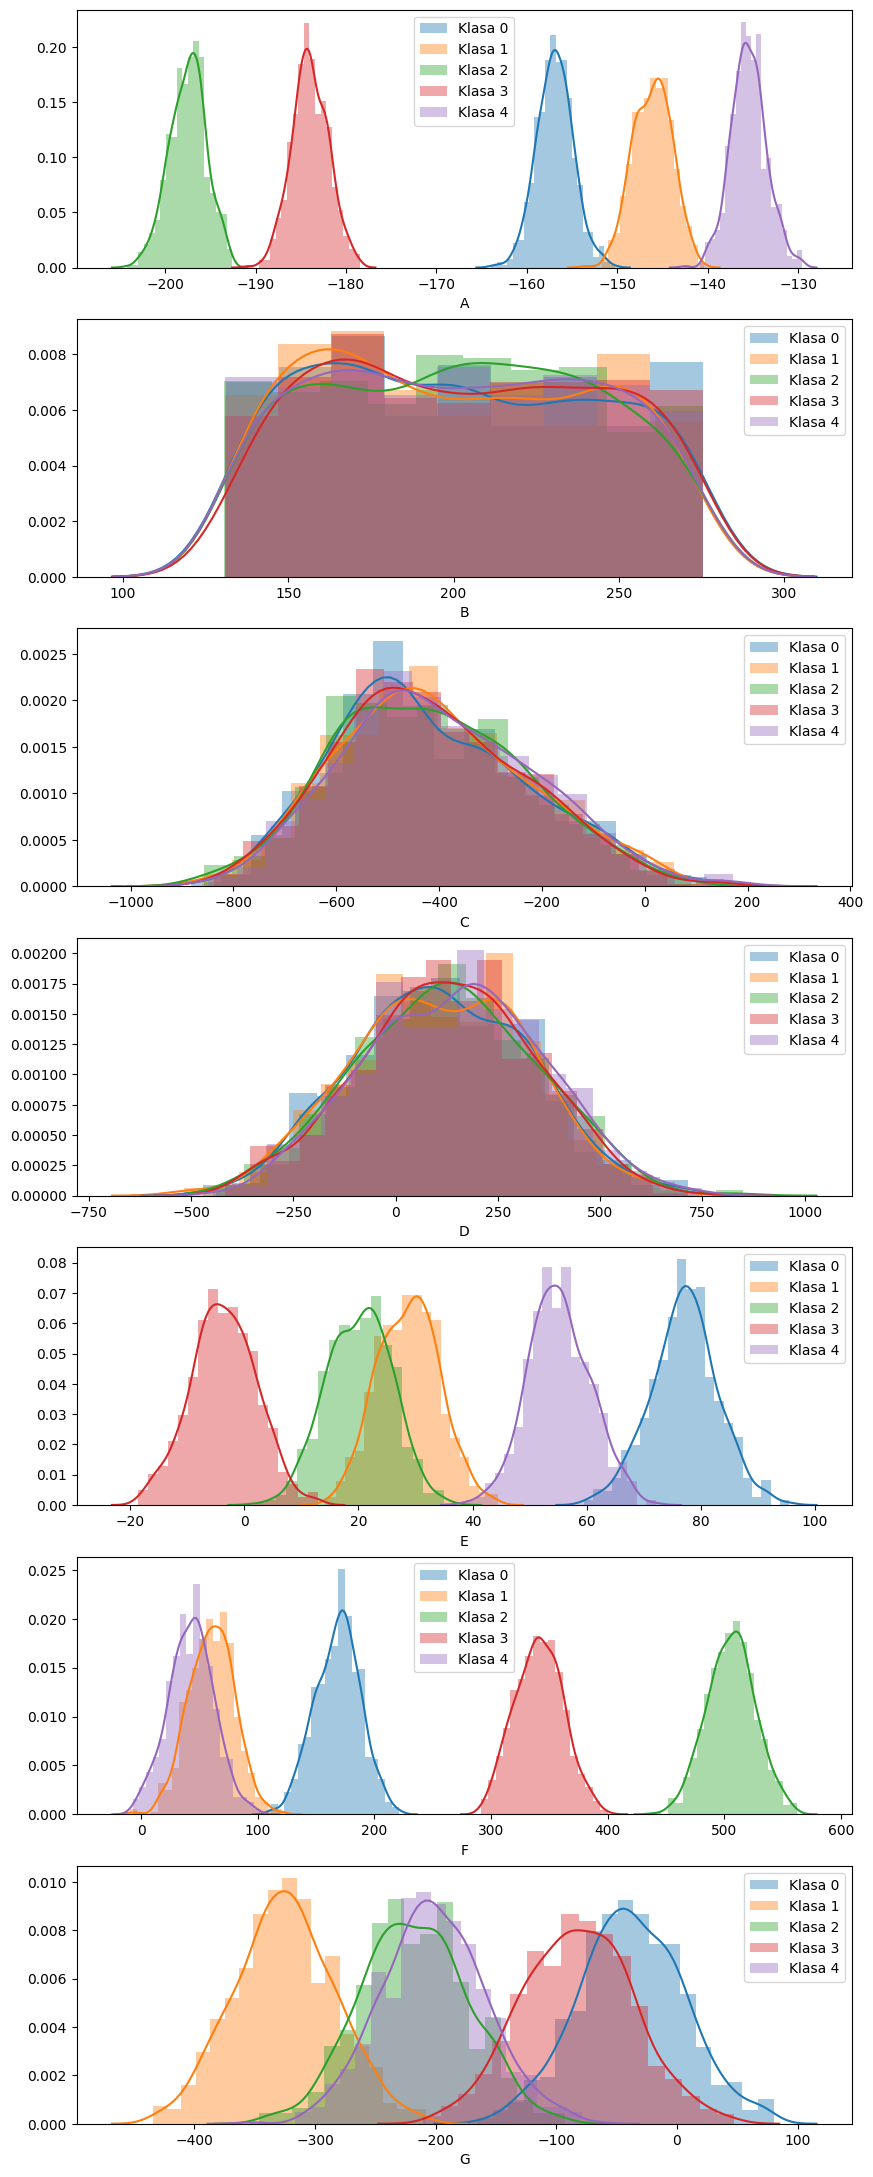

In [26]:
plt.figure(figsize=(10,28), dpi=100)

list_dane = list(enumerate(df.columns))[:-1]

for i, atr in list_dane:
    plt.subplot(7, 1, i+1)
    sns.distplot(df.loc[df['klasa']==0, atr], label='Klasa 0')
    sns.distplot(df.loc[df['klasa']==1, atr], label='Klasa 1')
    sns.distplot(df.loc[df['klasa']==2, atr], label='Klasa 2')
    sns.distplot(df.loc[df['klasa']==3, atr], label='Klasa 3')
    sns.distplot(df.loc[df['klasa']==4, atr], label='Klasa 4')
    plt.legend()

> Odrazu widać, że atrybuty A, F i (może być) E będą użyteczne aby odróżnić nowe dane od siebie, natomiast pozostałe atrybuty nie dają w tej sprawie jasności (bardzo duże obszary pokrywania się).

## Wykresy pudełkowe

> Wykresy pudełkowe niestety nie są tak użyteczne w tym przypadku, ponieważ różne atrybuty mają rozrzut w różnych skalach (A w zakresie <-129; -204>, D w zakresie <-118; 850>). Może być lepszym pomysłem byłoby rysowanie poszczególnych boxplotów we własnych skalach.

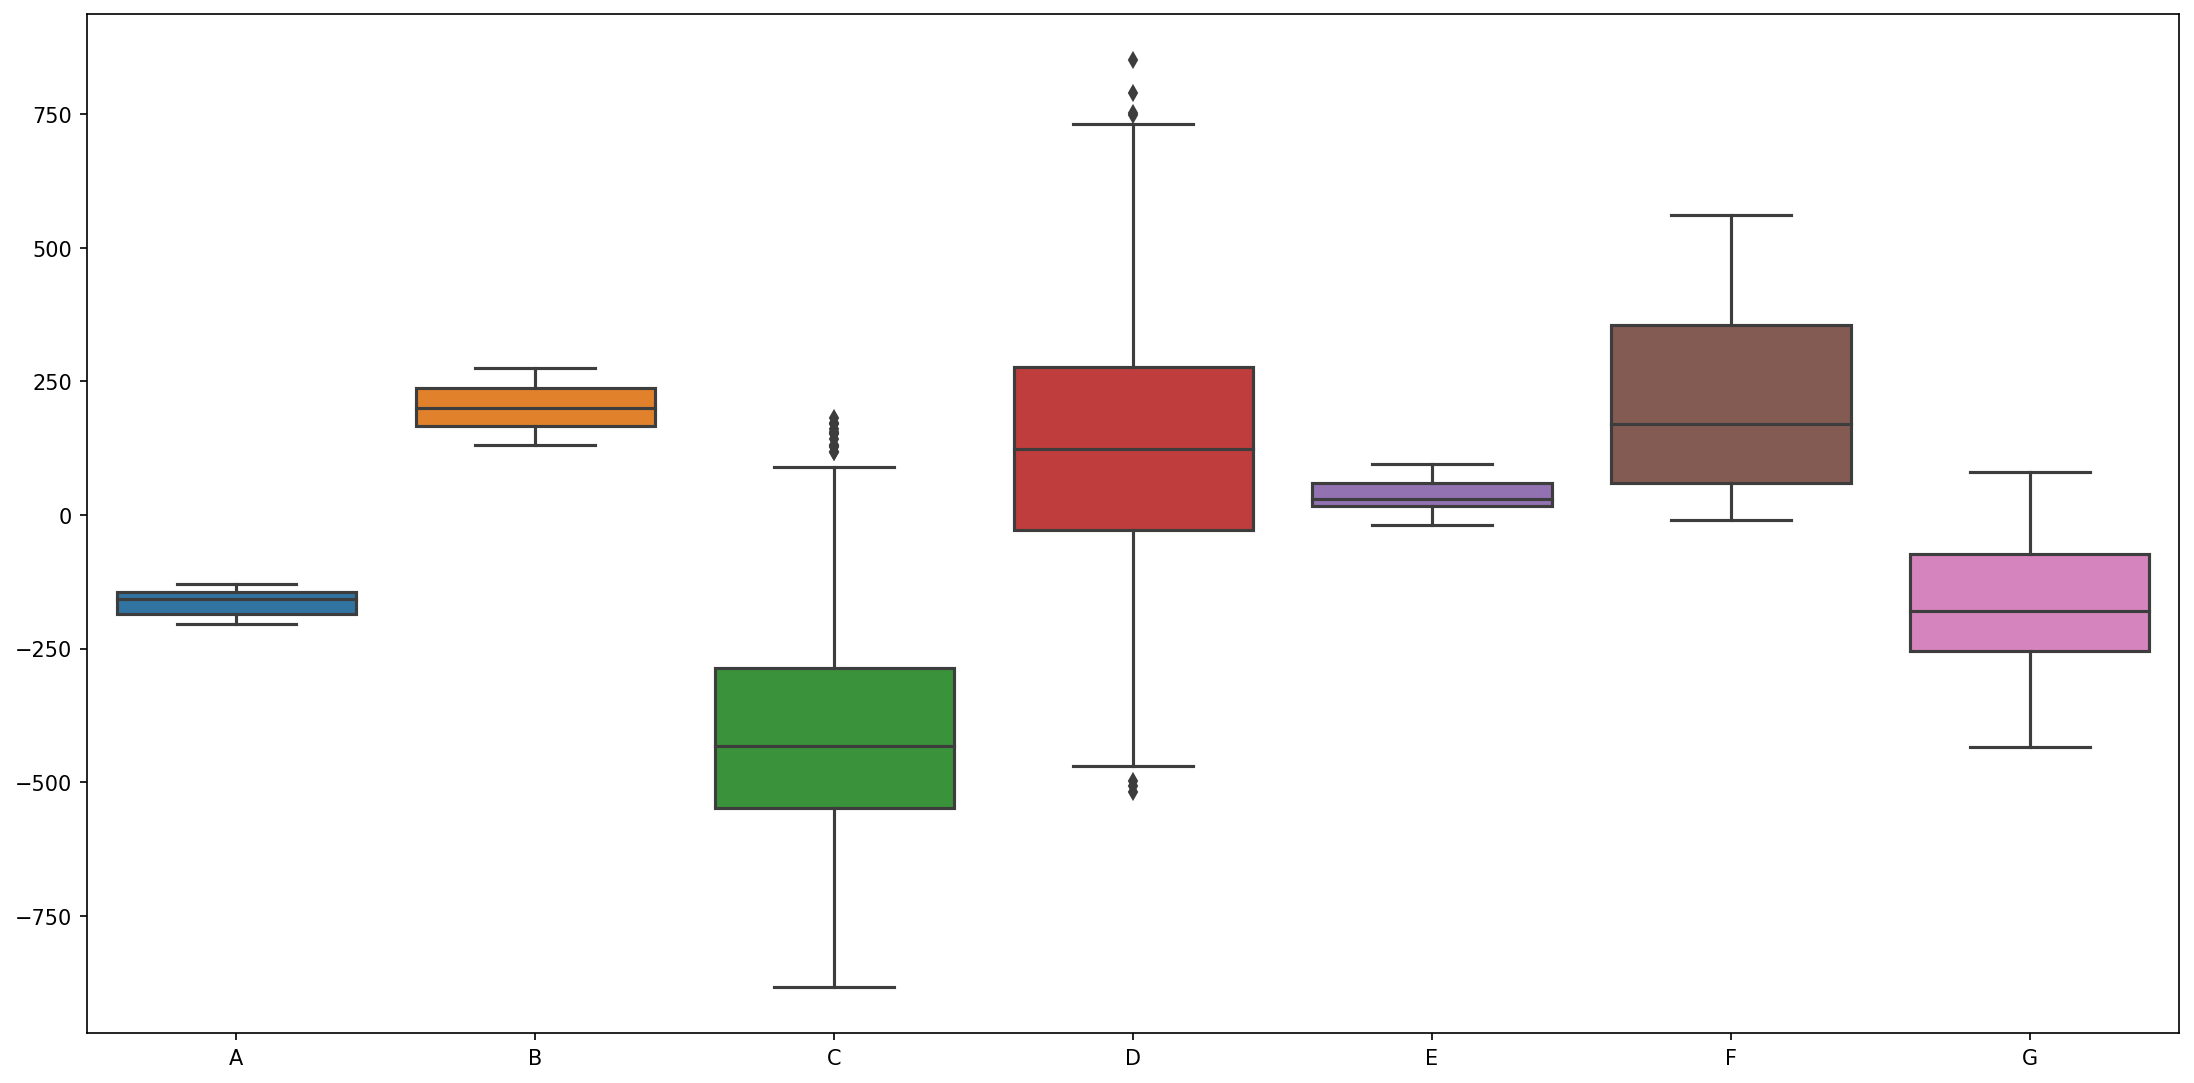

In [27]:
plt.figure(figsize=(18,9), dpi=150)
sns.boxplot(data=df.iloc[:,:-1])


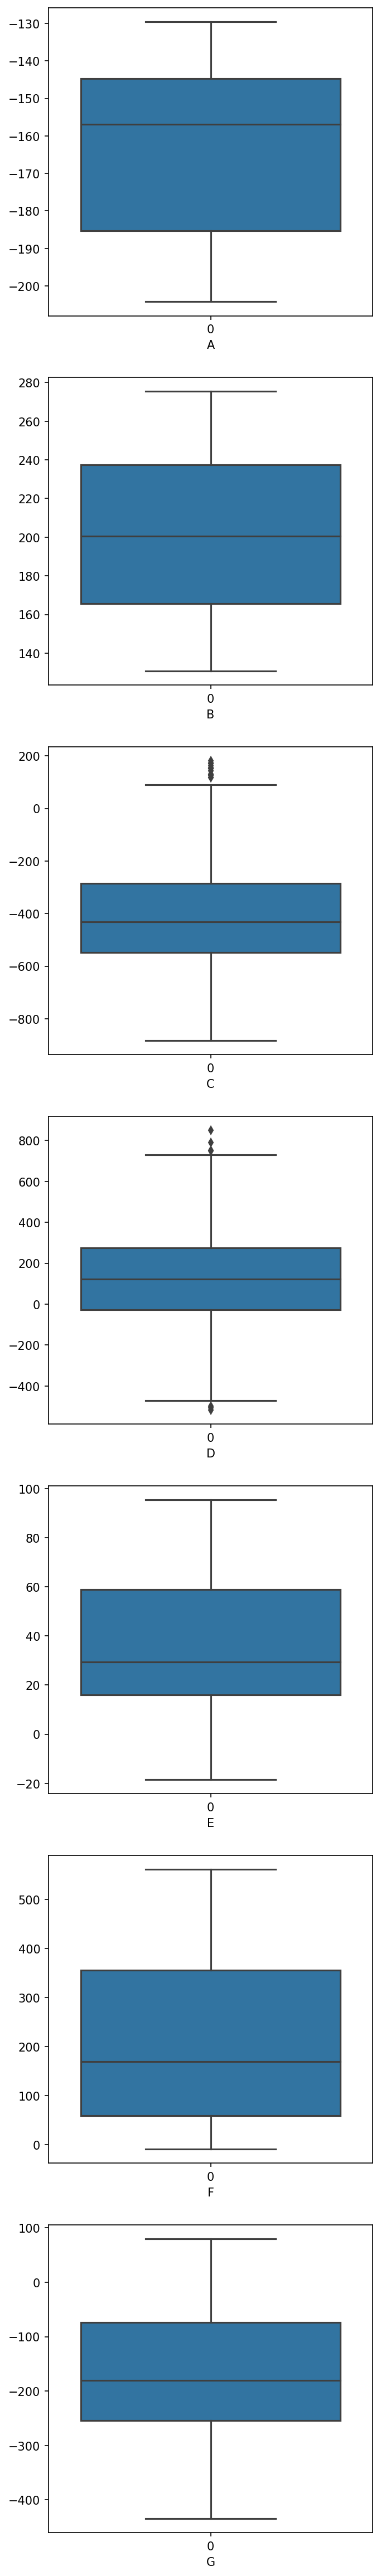

In [28]:
plt.figure(figsize=(5,40), dpi=150)

for i, atr in list_dane:
    plt.subplot(7, 1, i+1)
    ax = sns.boxplot(data=df.iloc[:,i])
    ax.set(xlabel=atr)

> Rysowanie boxplotów dla poszczególnych atrybutów polepsza sytuację. Zarówno jak i przy histogramach, możemy wnioskować o stopniu pokrywania się pomiędzy atrybutami. Ciekawe jest to, że atrybuty A i F mają sporą niegatywną korelację (położenie wykresów pudełkowych dla A jest odbiciem tego z F). Zbadamy to później.

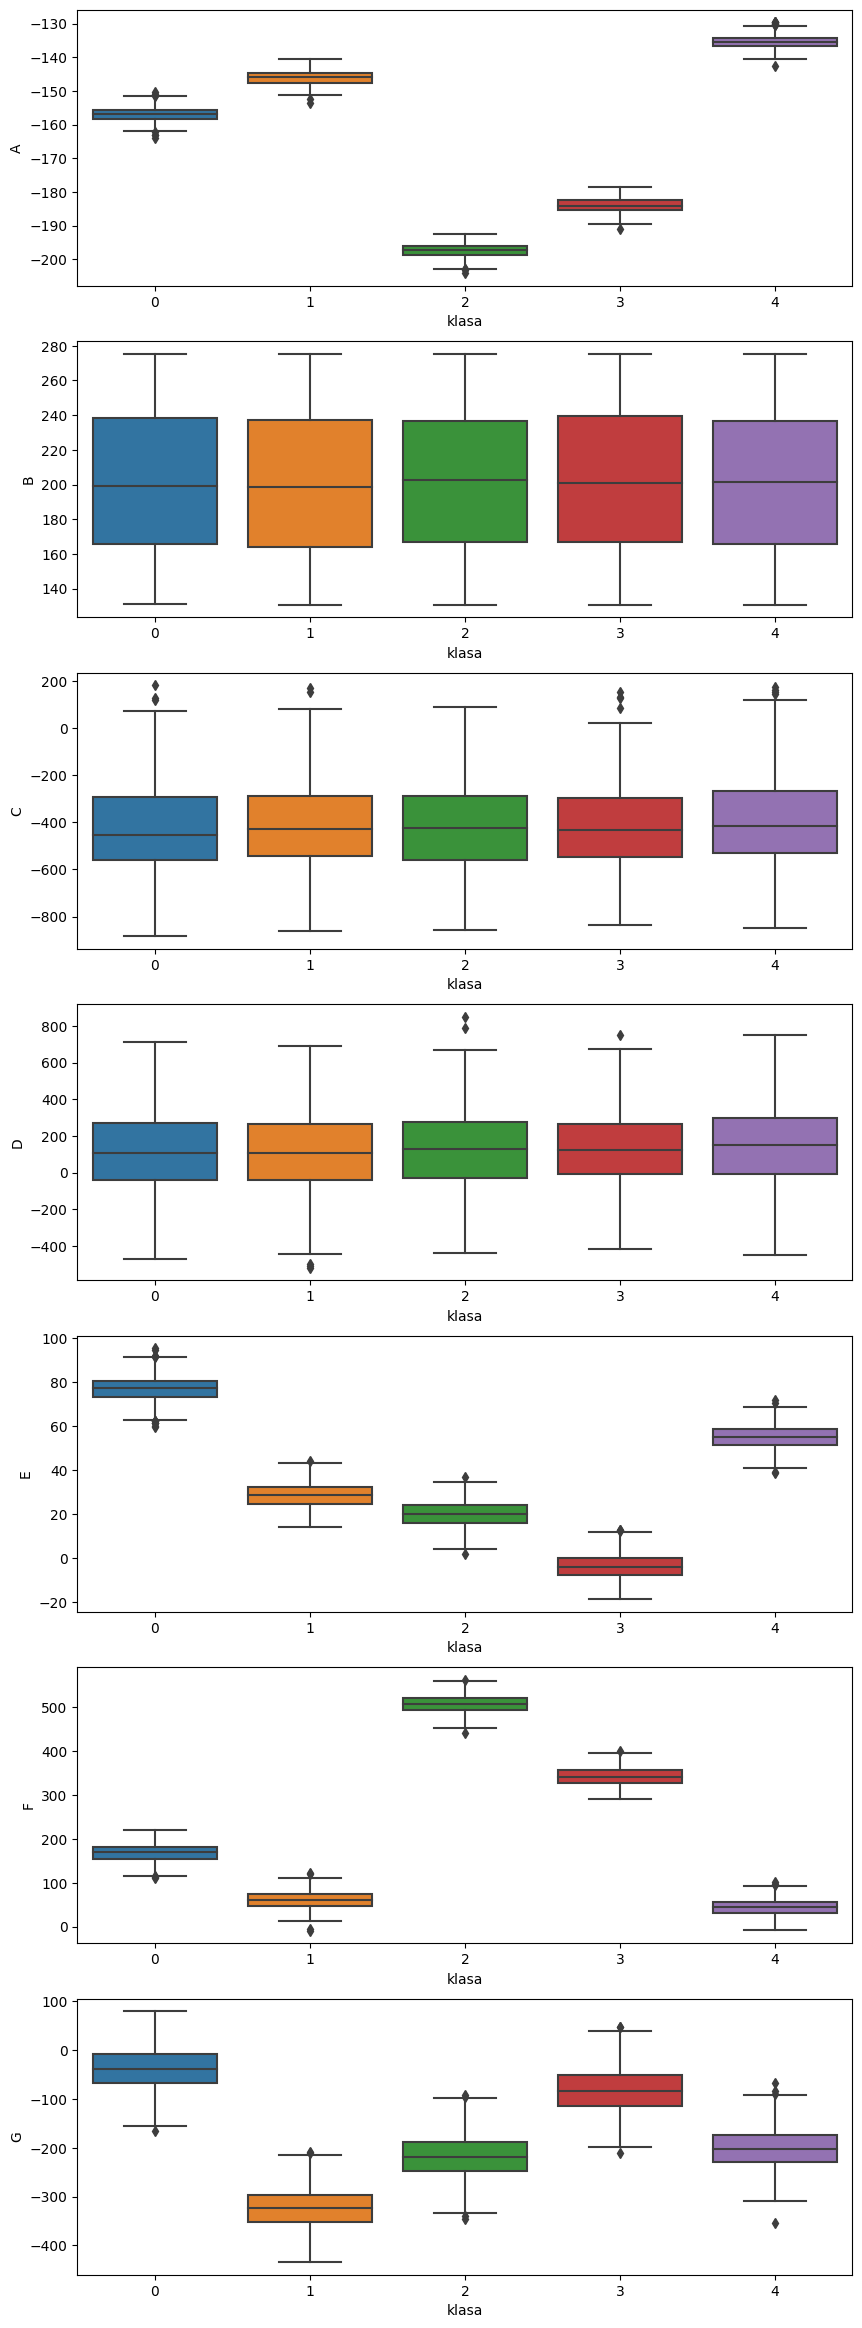

In [29]:
plt.figure(figsize=(10,30), dpi=100)

for i, atr in list_dane:
    plt.subplot(7, 1, i+1)
    sns.boxplot(x='klasa', y=atr, data=df)

## Wykresy punktowe

LinAlgError: singular matrix

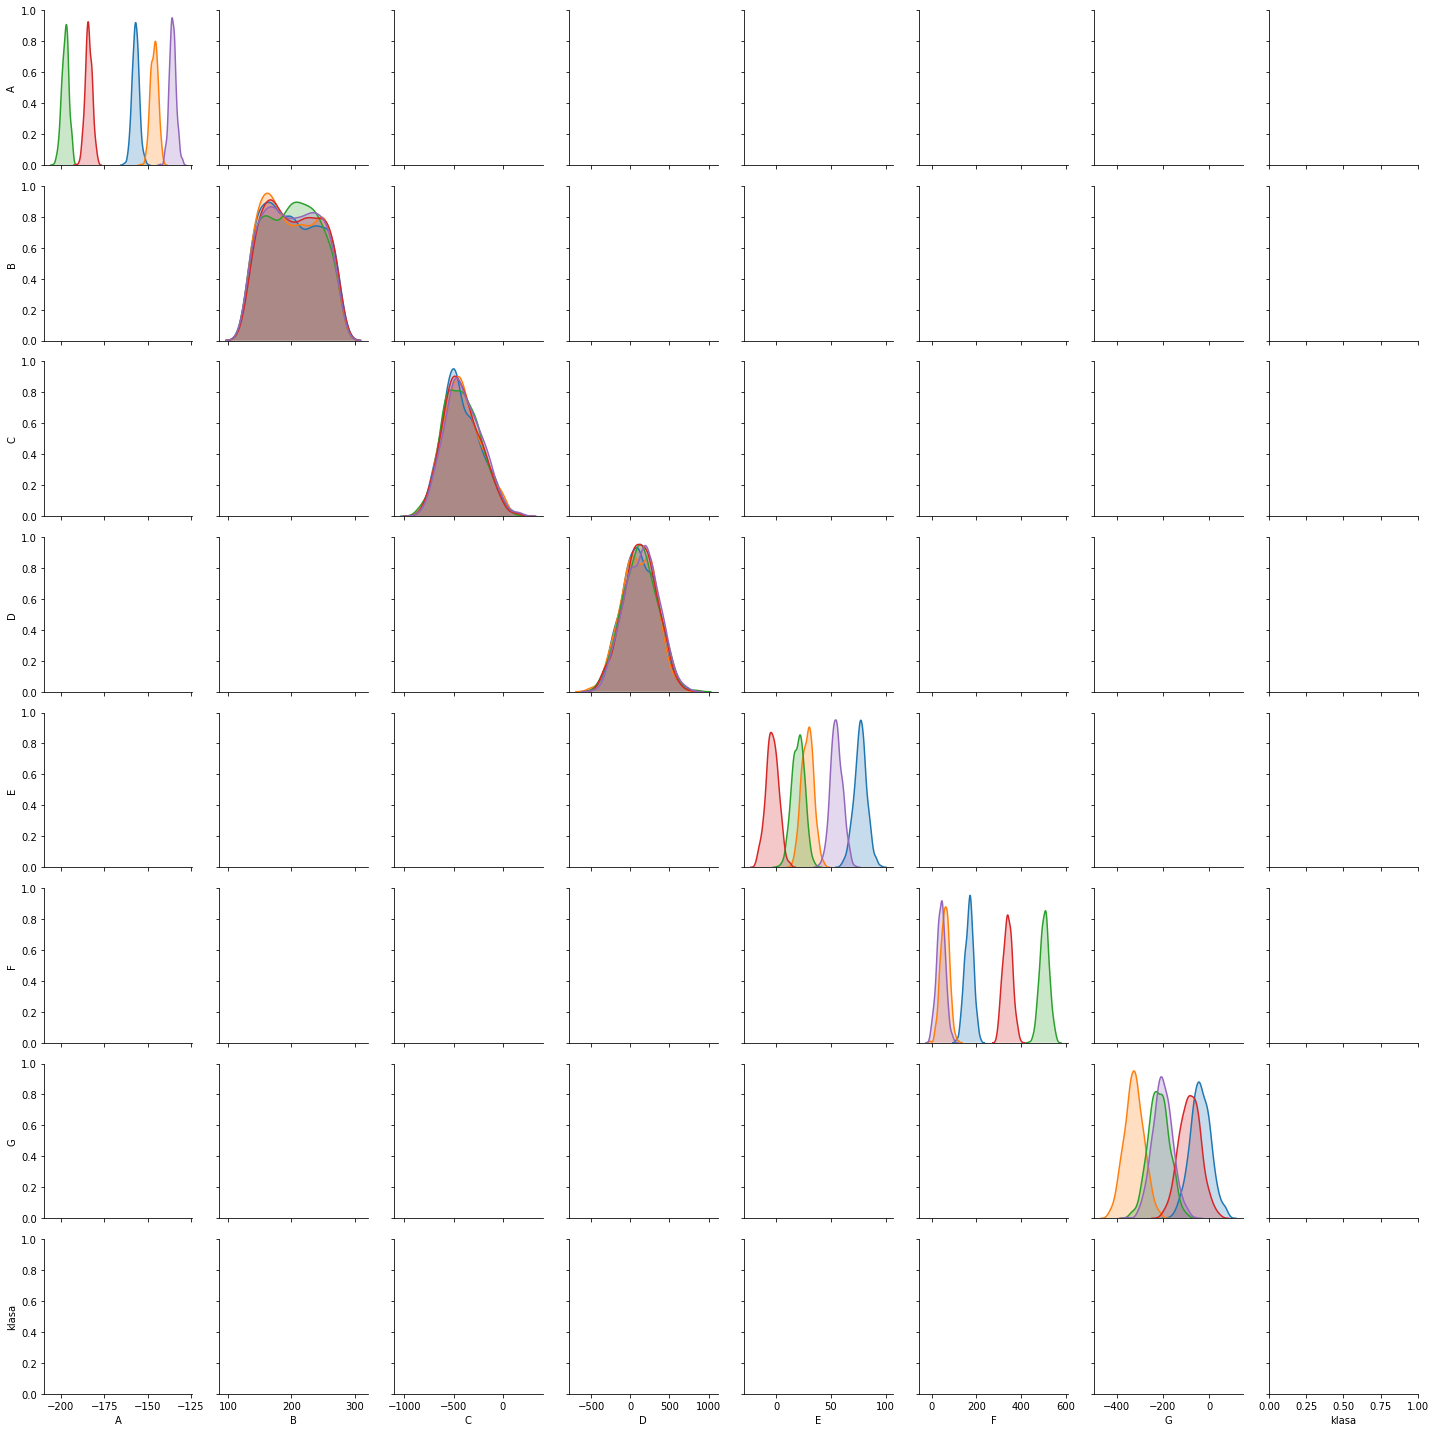

In [30]:
sns.pairplot(df, kind='scatter', hue='klasa')

> Nie udało mi się narysować macierz wykresów punktowych z podziałem na kolory - komunikat deklaruje że macierz jest "singular". Przeczytałem, że to może być związane właśnie z tą mocną korelacją negatywną pomiędzy A i F, ale po wyżucaniu tych atrybutów miałem ten sam błąd. Więc rysuję tylko macierz wykresów punktowych bez podziału na kolory:

In [31]:
df_classless = df.iloc[:,:-1]

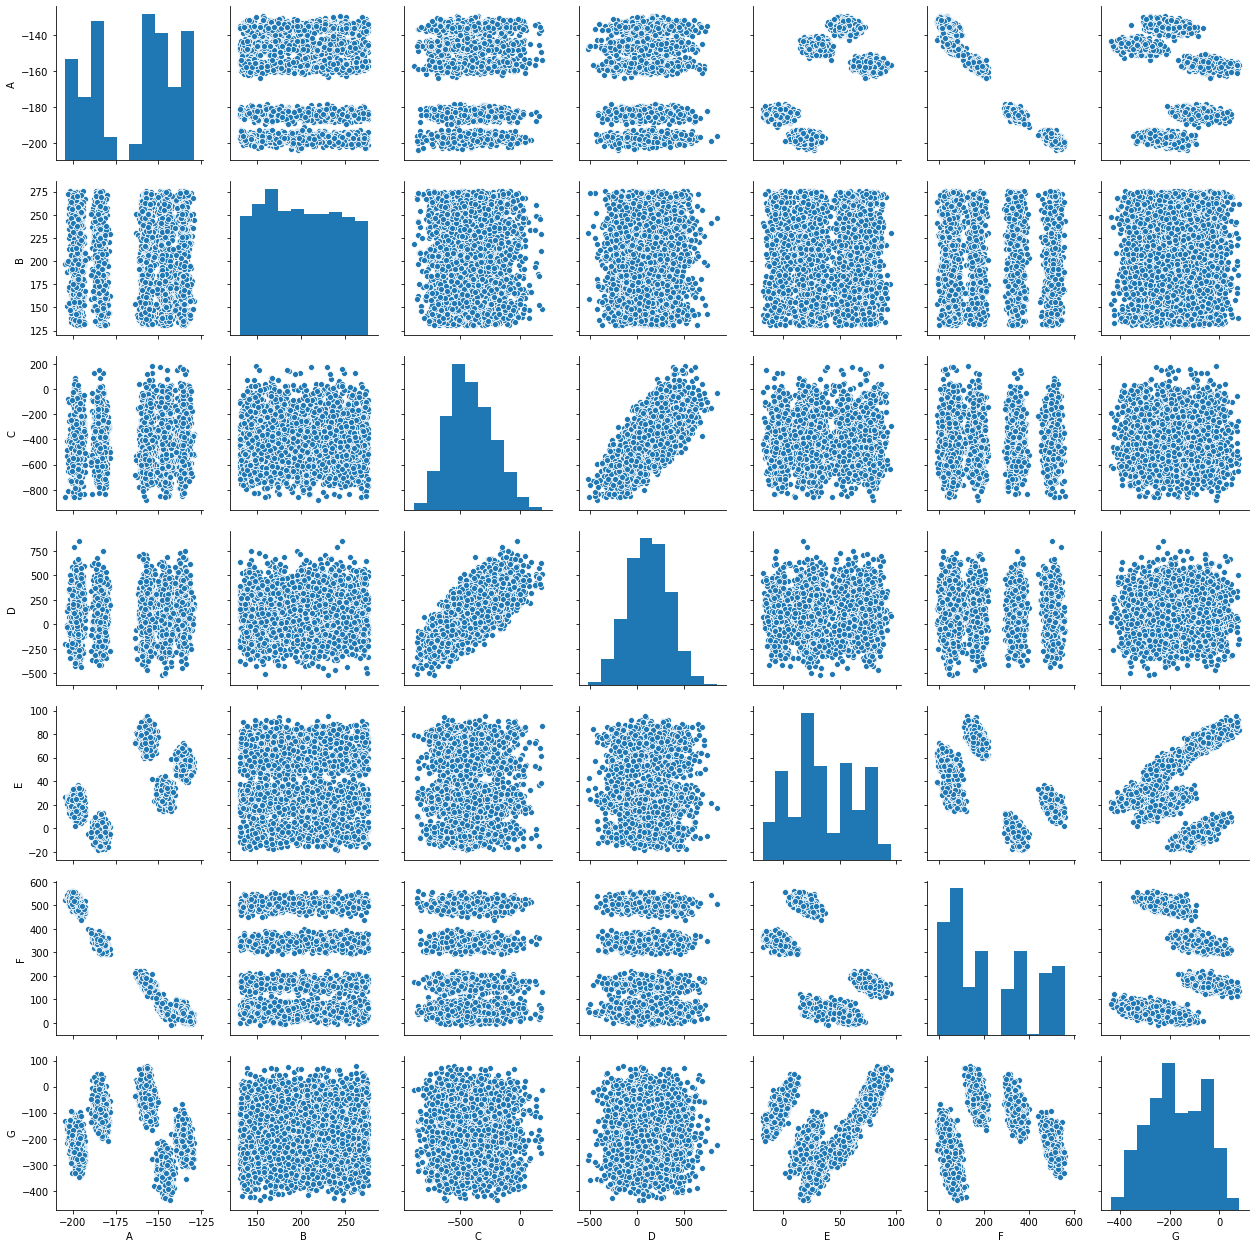

In [32]:
sns.pairplot(df_classless, kind='scatter')

## Macierz korelacji

> Dzięki macierzy korelacji dobrze widać niegatywną korelację którą już zauważyliśmy wcześniej. Większość pozostałych atrubutów jest skorelowana słabo.

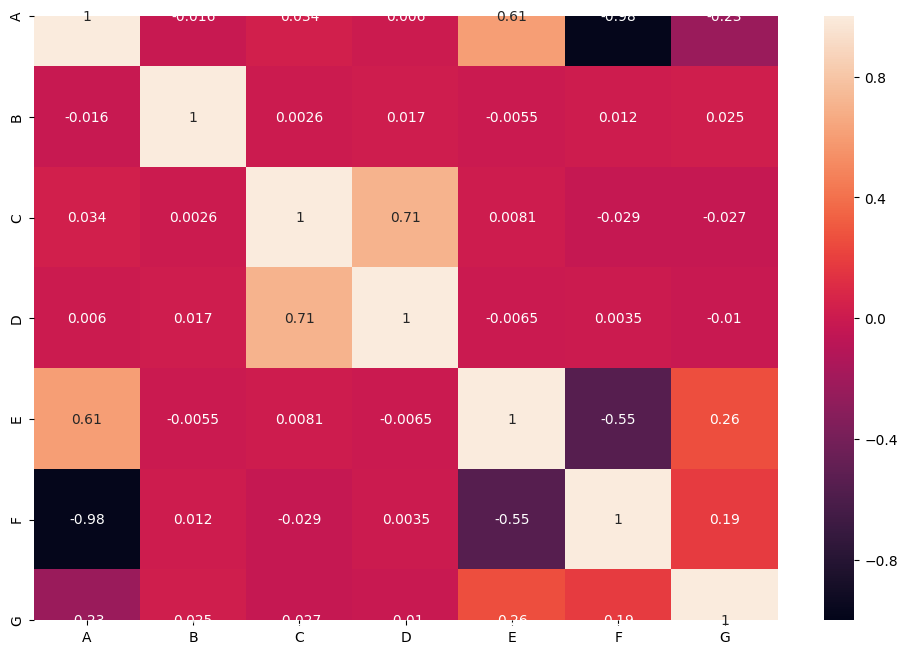

In [33]:
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(df_classless.corr(), vmin=-1, annot=df_classless.corr())

# Wnioski

> Przeanalizowanie danych za pomocą podstawowych miar danych oraz wizualizacji daje dobry obraz tych danych. Jabym opierał się głównie o atrybuty A i E w sprawie klasyfikacji, ponieważ atrybut F nie jest użyteczny (ma taką samą korelację z innymi atrybutami jak i A, tylko z przeciwnym znakiem).